# Task 2: Manipulating data

Here the coordinates themselves don't matter at all. the only thing important is their weights. Bin the dataframe's 'weights' into five equeal sized bins, where the bins are counted as = 0 | max/4 | max/2 | max/4*3 | max. Plot this binned data as a histogram using seaborn or plt.

In [1]:
from IPython.core.display import HTML # For the HTML language

import warnings
warnings.filterwarnings('ignore') # Against the error messages of the multiple imports.

In [2]:
# Here is a short code to hide the codes blocks to see just the images.
# An .HTML file looks better/cleaner if you turn on this. 
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
value="Click here to toggle on/off the raw code."></form>''')



In [3]:
#import the packages what we need
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('../solar_mesh.csv',skiprows=[0],header = None) 
# We can simply read the file with pandas, fortunately is in the manageable form,
# we have to set the first collumn to index collumn with "index_col=0".
# We can set the new index for the plot as df = df.set_index('bins_lat') but the first line is more formal. 

In [5]:
df.drop([0], axis = 1, inplace = True) #drop the first collumn where the cordinates are

In [6]:
column_maxes = df.max()
df_max = column_maxes.max() #calculate the max and min value that I can make the intervall range
column_mins = df.min()
df_min = column_mins.min()

In [7]:
bins = pd.interval_range(start=df_min, end= df_max, periods=4) # I made the intervals here

In [8]:
df_new = df.apply(pd.cut, bins=bins) # Make the new frame  with the intervals

In [9]:
df_new =df_new.fillna(bins[0]) # we got some Nan so, we add to there the correct interval

In [10]:
all_values = []

for column in df_new:
    this_column_values = df_new[column].tolist() # I made a new frame that i can count how many data in the intervals
    all_values += this_column_values

one_column_df = pd.DataFrame(all_values)

#print(one_column_df)

In [11]:
counted = one_column_df.value_counts().to_frame() # Count the intervals
counted.columns = ['Counted weight value'] # Add a collumn name for the label

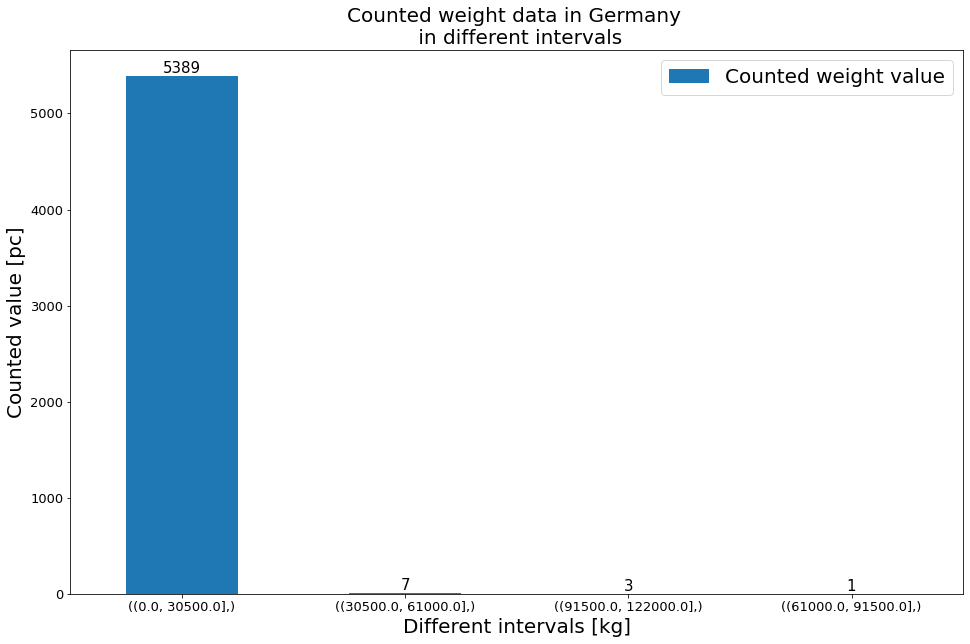

In [12]:
ax = counted.plot.bar(figsize=(16, 10),rot = 0,fontsize = 13,stacked=True)
ax.bar_label(ax.containers[0],size=(15)) # here is the annotation
title('Counted weight data in Germany \n in different intervals', size=(20))
xlabel('Different intervals [kg]', size=(20))
ylabel('Counted value [pc]', size=(20))
legend(loc='upper right', prop={'size': 20})
#plt.savefig('counted_hist_plot.jpg', dpi=600, format='jpg') #Uncmmand this if you would like to save the fig.
plt.show()